In [1]:
# IMPORT LIBRARY 

from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

# 随机森林, GBR, KNN, LR, Decision Tree, GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
rs = check_random_state(4421)

In [2]:
data = pd.read_csv('games.csv')

data.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","seasonId"],axis = 1,inplace = True)

data = data[data['gameDuration']>=300]

data=data[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills','t2_riftHeraldKills'
       ]]

In [3]:
data

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,2,1,2,2,0,2,0,2,0,0,0,0,10,2,0,4,0
51486,2,1,1,2,2,2,2,5,4,0,2,0,11,7,4,4,1
51487,2,2,2,2,0,1,0,0,0,0,1,0,10,2,0,2,0
51488,2,2,2,2,0,2,0,0,0,0,0,0,11,3,0,1,0


In [4]:
X = data.drop(['winner'], axis=1)
Y = data['winner'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=rs)

In [5]:
range1 = range(2, 30)
range2 = range(1, 8)
score = 0
precision = []

for es1 in range1:
    for es2 in range2:
        dtree = DecisionTreeRegressor(random_state=rs, 
                                      min_samples_split= es1, 
                                      min_samples_leaf = es2)
        dtree.fit(X_train, y_train)
        prediction = dtree.predict(X_test)
        accuracy_test = accuracy_score(y_test, prediction.round())
        if(score < accuracy_test):
            y_pred = prediction
            score = accuracy_test
            best1 = es1
            best2 = es2
        precision.insert(es1, accuracy_test)

print("Precision: {0: .10f}".format(score))
print("min_samples_split: " +format(best1))
print("min_samples_leaf: " +format(best2))

Precision:  0.9777313848
min_samples_split: 26
min_samples_leaf: 7


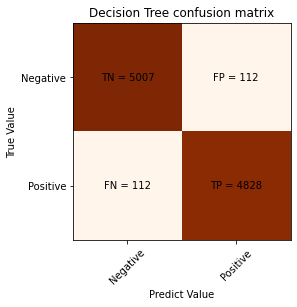

In [7]:
y_pred = y_pred.round()

confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('Decision Tree confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')

#plt.savefig("DT-con",dpi=240,bbox_inches='tight')

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt2=DecisionTreeClassifier(criterion="gini",max_depth=4, splitter="best")
dt2.fit(X_train,y_train)
print("score:", dt2.score(X_test,y_test))

score: 0.9719654041157173


In [61]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=X.columns,class_names=["1","2"], 
                     filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.view()

'Source.gv.pdf'

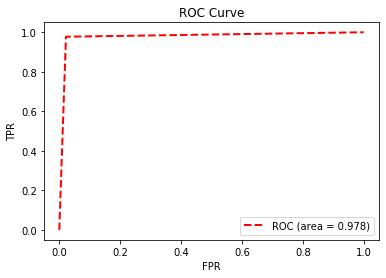

In [62]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thersholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', color='red',label='ROC (area = {0:.3f})'.format(roc_auc), lw=2)

    
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('DT-roc',dpi=240,bbox_inches='tight')
plt.show()

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.97812   0.97812   0.97812      5119
           2    0.97733   0.97733   0.97733      4940

    accuracy                        0.97773     10059
   macro avg    0.97772   0.97772   0.97772     10059
weighted avg    0.97773   0.97773   0.97773     10059

